## 関連ライブラリインストール

### Ubuntu日本語フォント(Takao)

* 日本語が化けるので
* コマンド
    * apt-get install 'fonts-takao-*'
* 確認
    * fc-list | grep Takao
* 初期化
    * ~/.cache/matplotlib/fontList.json を削除
    * Jupyterを再起動

## 初期設定

In [1]:
# http://qiita.com/hik0107/items/de5785f680096df93efa
# グラフ化に必要なものの準備
import matplotlib
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt

# Jupyter上に図を表示するためのおまじない
%matplotlib inline

# データの扱いに必要なライブラリ
import pandas as pd
import numpy as np
import datetime as dt

# チャートがきれいになるおまじない
plt.style.use('ggplot') 

# 日本語フォント対応
font_path = '/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf'
font_prop = FontProperties(fname=font_path)
matplotlib.rcParams['font.family'] = font_prop.get_name()

## サンプルデータ

In [3]:
df = pd.read_csv('csv/ruby_1.csv')
df

,name,ruby,php,python,perl
0,A,100,40,70,80
1,B,60,90,80,10
2,C,90,60,60,60
3,D,80,70,70,80


## 基本的な描画

### 一つの画面に表示

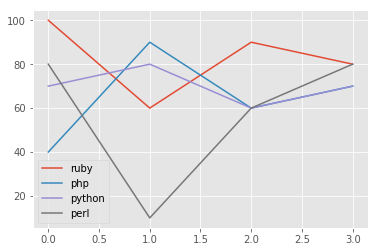

In [4]:
df.plot()

### 図を保存

In [13]:
# 初期化 (繰り返し作業をする場合、前の結果が残っている場合があるため)
plt.figure()

# 図の作成
df.plot()

# ファイルの保存
plt.savefig('img/hoge.png')

# 閉じる
plt.close('all')

### それぞれの画面に表示

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9611c29630>,
      dtype=object)

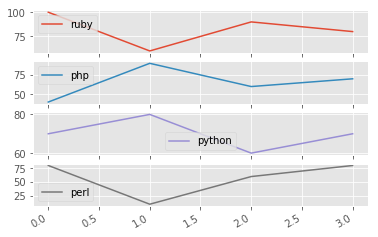

In [15]:
df.plot(subplots=True)

### 行数、列数を指定

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9611a63400>,
      dtype=object)

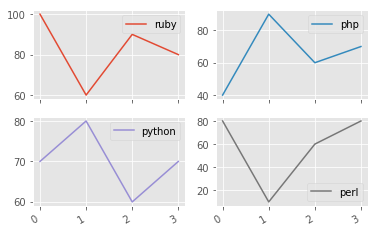

In [18]:
## タプルで指定
df.plot(subplots=True, layout=(2, 2))

### y軸、x軸の範囲を共通化

* sharex : x軸の共通化
* sharey : y軸の共通化

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9611b0dac8>,
      dtype=object)

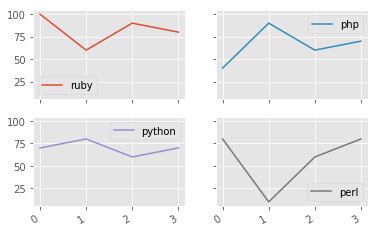

In [19]:
## タプルで指定
df.plot(subplots=True, layout=(2, 2), sharex=True, sharey=True)

### 棒グラフ

In [28]:
df = pd.read_csv('csv/ruby_1.csv', index_col=0)
df

,ruby,php,python,perl
name,,,,
A,100,40,70,80
B,60,90,80,10
C,90,60,60,60
D,80,70,70,80


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f96116491d0>,
      dtype=object)

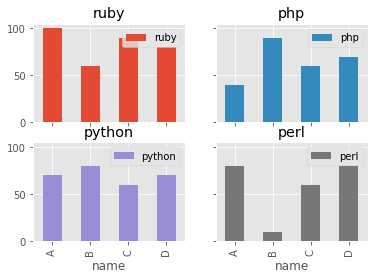

In [29]:
df.plot.bar(subplots=True, layout=(2, 2), sharex=True, sharey=True)

## 時系列データ

* parse_dates=True : データ中の日付文字列をパースして日付型に変換してロード
* index_col=0 : 日付データの列をindexに指定

In [41]:
df = pd.read_csv('csv/date.csv', parse_dates=True, index_col=0)
df

,A,B
date,,
2018-02-03,83,140
2018-02-04,80,150
2018-02-05,85,149
2018-02-06,72,142
2018-02-07,81,151


* skiprows=1 : 1行目(date A B)を読み飛ばす
* names : 列名を指定

In [3]:
df = pd.read_csv('csv/date.csv', parse_dates=True, skiprows=1, index_col=0, names=('日付', '体重', '身長'))
df

,体重,身長
日付,,
2018-02-03,83,140
2018-02-04,80,150
2018-02-05,85,149
2018-02-06,72,142
2018-02-07,81,151


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedf503c8d0>,
      dtype=object)

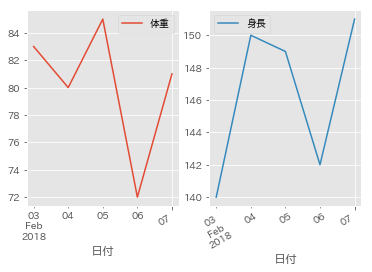

In [6]:
#df.plot()
df.plot(subplots=True, layout=(1, 2), )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fedf711ee10>,
      dtype=object)

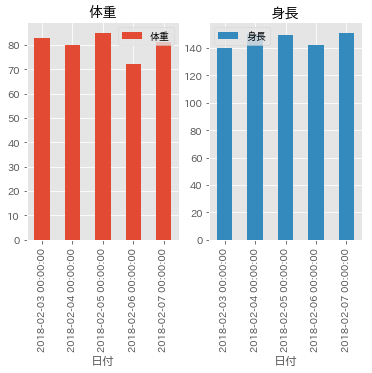

In [5]:
df.plot.bar(subplots=True, layout=(1, 2), )